In [690]:
import cv2
from glob import glob
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import os
import time
import numpy as np

In [691]:
# Load the model once
model = YOLO("yolov6n.yaml")
model.info()

YOLOv6n summary: 121 layers, 4,500,080 parameters, 4,500,064 gradients, 13.1 GFLOPs


(121, 4500080, 4500064, 13.1051008)

In [692]:
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.183 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.93 🚀 Python-3.9.12 torch-2.6.0 CPU (Apple M3)
engine/trainer: task=detect, mode=train, model=yolov6n.yaml, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

train: Scanning /Users/mjrchy/Documents/BCSLens/yolo-flutter-app/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning /Users/mjrchy/Documents/BCSLens/yolo-flutter-app/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.0005), 61 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.493      5.691      4.322         22        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100         0G      3.313      5.708      4.341         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      3/100         0G      3.134      5.699      4.322         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      4/100         0G      3.073      5.708      4.365         35        640: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      5/100         0G      3.419      5.543      4.338         25        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      6/100         0G      2.799      5.319      4.296         31        640: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      7/100         0G      2.907       5.81      4.382         25        640: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      8/100         0G       3.49      5.809      4.327         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      9/100         0G      3.101      5.623      4.262         36        640: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     10/100         0G      3.501      5.504      4.314         27        640: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     11/100         0G      3.377      5.741      4.301         29        640: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100         0G      3.129      5.892      4.359         21        640: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      3.252      5.632      4.324         40        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     14/100         0G      2.856      5.622      4.302         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     15/100         0G      3.101      5.767       4.31         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     16/100         0G      3.507      5.452      4.371         28        640: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     17/100         0G      3.147      5.834      4.346         26        640: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     18/100         0G      3.146      5.769      4.278         33        640: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/100         0G      3.382      5.519      4.293         42        640: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/100         0G      3.427      5.743      4.362         18        640: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/100         0G      3.233      5.504      4.268         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     22/100         0G      2.996      5.534      4.266         29        640: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     23/100         0G      3.106      5.543      4.318         27        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     24/100         0G      3.282      5.399      4.238         20        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/100         0G      3.308      5.478      4.384         27        640: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/100         0G      3.403      5.572      4.374         28        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/100         0G      3.084      5.532      4.258         24        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     28/100         0G      3.248      5.652       4.31         34        640: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     29/100         0G      3.149       5.67      4.319         36        640: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/100         0G      3.311      5.514       4.26         33        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100         0G      3.214      5.515      4.316         44        640: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     32/100         0G      2.917      5.692      4.339         22        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     33/100         0G      2.891      5.647       4.32         10        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100         0G      3.034      5.692      4.263         33        640: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     35/100         0G      3.187      5.402       4.27         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G      2.867       5.66      4.337         29        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     37/100         0G       3.67      5.572      4.372         24        640: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     38/100         0G      2.652      5.984      4.268         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/100         0G      3.039      5.601      4.211         18        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     40/100         0G      3.012       5.52      4.407         26        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     41/100         0G      3.151      5.783      4.273         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/100         0G      3.121      5.864      4.345         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     43/100         0G      3.201      5.445      4.324         31        640: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     44/100         0G      3.269      5.559      4.282         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100         0G      2.761      5.593      4.319         31        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/100         0G      3.189      5.482      4.266         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     47/100         0G      3.235      5.376      4.348         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     48/100         0G      3.277      5.414      4.305         36        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      2.758      5.543      4.297         15        640: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     50/100         0G      2.996      5.364      4.312         24        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100         0G      3.287      5.569      4.344         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     52/100         0G      3.002      5.624      4.296         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     53/100         0G      2.826        5.5      4.356         20        640: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100         0G       3.48      5.496      4.298         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     55/100         0G      2.709      5.723      4.311         26        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     56/100         0G      3.739      6.046      4.247         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     57/100         0G      3.149      5.449      4.247         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/100         0G      3.548      5.371      4.268         46        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     59/100         0G       3.65      5.407      4.287         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     60/100         0G      3.507      5.657      4.259         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     61/100         0G      2.955      5.507      4.331         34        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     62/100         0G      3.163      5.507        4.3         49        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     63/100         0G       3.26      5.491      4.337         28        640: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/100         0G      3.479      5.511      4.315         30        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     65/100         0G      3.347      5.491       4.27         19        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/100         0G       3.41      5.763      4.242         18        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     67/100         0G      3.286      5.409      4.276         60        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     68/100         0G      3.031       5.41      4.208         31        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     69/100         0G      2.991      5.454      4.256         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     70/100         0G      3.522      5.541      4.266         22        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     71/100         0G      3.577      5.547      4.205         33        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     72/100         0G      3.376      5.459      4.264         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     73/100         0G      3.231      5.324      4.267         38        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     74/100         0G       3.11      5.512       4.34         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     75/100         0G      3.184      5.301      4.322         25        640: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     76/100         0G      3.098      5.413      4.263         27        640: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     77/100         0G        3.1      5.363      4.316         32        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     78/100         0G      3.299      5.393      4.267         44        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     79/100         0G      3.227      5.397      4.261         18        640: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     80/100         0G      3.196      5.534      4.257         22        640: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     81/100         0G      2.746      5.461      4.303         35        640: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     82/100         0G      3.386      5.494      4.325         37        640: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     83/100         0G      3.483      5.471      4.284         45        640: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      3.036      5.569      4.301         27        640: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     85/100         0G      3.182       5.33      4.308         20        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     86/100         0G      3.031      5.744       4.27         20        640: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     87/100         0G      3.282      5.498      4.287         22        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     88/100         0G      2.933      5.469       4.25         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     89/100         0G      2.952      5.412      4.229         19        640: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     90/100         0G      3.067      5.325      4.357         39        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all          4         17          0          0          0          0
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     91/100         0G      2.821      5.675      4.298         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     92/100         0G      2.517      5.925      4.555         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     93/100         0G      3.105      5.636      4.237         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     94/100         0G      2.926      5.725      4.255         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     95/100         0G      2.812      5.386      4.285         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     96/100         0G      2.833      5.569      4.251         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     97/100         0G      2.792      5.697      4.237         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     98/100         0G      2.845      5.836      4.274         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     99/100         0G      2.882      5.587      4.305         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all          4         17          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    100/100         0G      2.924        5.5       4.23         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all          4         17          0          0          0          0

100 epochs completed in 0.034 hours.


Optimizer stripped from runs/detect/train3/weights/last.pt, 9.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 9.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.9.12 torch-2.6.0 CPU (Apple M3)
YOLOv6n summary (fused): 68 layers, 4,495,392 parameters, 0 gradients, 13.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


                   all          4         17          0          0          0          0
                person          3         10          0          0          0          0
                   dog          1          1          0          0          0          0
                 horse          1          2          0          0          0          0
              elephant          1          2          0          0          0          0
              umbrella          1          1          0          0          0          0
          potted plant          1          1          0          0          0          0
Speed: 0.9ms preprocess, 73.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train3


In [694]:
results = model("/Users/mjrchy/Documents/BCS-models-training-new-data/BCSLens-models/animalpose_image/dog/do2.jpeg")


image 1/1 /Users/mjrchy/Documents/BCS-models-training-new-data/BCSLens-models/animalpose_image/dog/do2.jpeg: 480x640 (no detections), 41.7ms
Speed: 1.1ms preprocess, 41.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


In [695]:
results.show()
print(results[0].boxes)       # bounding boxes + scores + classes
print(results[0].names)

AttributeError: 'list' object has no attribute 'show'

In [ ]:
# Dataset path
root_dir = 'animalpose_image'
classes = ['Dog', 'Cat', 'Horse', 'Sheep', 'Cow']
views = ['front', 'left', 'right', 'top', 'back']
image_paths = []

In [ ]:
# Load image paths and labels
for cls in classes:
    paths = glob(f"{root_dir}/{cls.lower()}/*.jpeg")
    print(paths)
    image_paths += [(img_path, cls) for img_path in paths] 
    print(f"Loaded {len([p for p in image_paths if p[1] == cls])} images for class '{cls}'")
    cls_dir = os.path.join(root_dir, cls.lower())
    print(f"Directory for {cls.lower()} {'exists' if os.path.exists(cls_dir) else 'does NOT exist.'}")

print(f"Total images to evaluate: {len(image_paths)}")


['animalpose_image/dog/do124.jpeg', 'animalpose_image/dog/do48.jpeg', 'animalpose_image/dog/do173.jpeg', 'animalpose_image/dog/do7.jpeg', 'animalpose_image/dog/do165.jpeg', 'animalpose_image/dog/do132.jpeg', 'animalpose_image/dog/do72.jpeg', 'animalpose_image/dog/do149.jpeg', 'animalpose_image/dog/do25.jpeg', 'animalpose_image/dog/do33.jpeg', 'animalpose_image/dog/do108.jpeg', 'animalpose_image/dog/do64.jpeg', 'animalpose_image/dog/do128.jpeg', 'animalpose_image/dog/do13.jpeg', 'animalpose_image/dog/do190.jpeg', 'animalpose_image/dog/do44.jpeg', 'animalpose_image/dog/do186.jpeg', 'animalpose_image/dog/do169.jpeg', 'animalpose_image/dog/do52.jpeg', 'animalpose_image/dog/do145.jpeg', 'animalpose_image/dog/do91.jpeg', 'animalpose_image/dog/do112.jpeg', 'animalpose_image/dog/do29.jpeg', 'animalpose_image/dog/do104.jpeg', 'animalpose_image/dog/do153.jpeg', 'animalpose_image/dog/do68.jpeg', 'animalpose_image/dog/do87.jpeg', 'animalpose_image/dog/do69.jpeg', 'animalpose_image/dog/do86.jpeg', 

In [ ]:
# Initialize lists for predictions and ground truth
y_true = []
y_pred = []
inference_times = []

In [ ]:
# Start evaluation
print("Starting model evaluation...")
total_start_time = time.time()

Starting model evaluation...


In [ ]:

# for i, (img_path, true_label) in enumerate(image_paths):
#     # Load image
#     img = cv2.imread(img_path)
#     if img is None:
#         print(f"Warning: Could not load image {img_path}")
#         continue
    
#     # Measure inference time for this image
#     img_start_time = time.time()
#     results = model.predict(img, conf=0.25, verbose=False)
#     img_end_time = time.time()
    
#     img_inference_time = img_end_time - img_start_time
#     inference_times.append(img_inference_time)
    
#     # Get prediction - only consider target classes
#     boxes = results[0].boxes
#     pred_label = 'Unknown'
    
#     if len(boxes) > 0:
#         # Get all detections and filter for target classes only
#         best_conf = -1
#         best_pred = 'Unknown'
        
#         for j in range(len(boxes)):
#             cls_id = int(boxes.cls[j].item())
#             confidence = float(boxes.conf[j].item())
#             detected_class = model.names[cls_id].capitalize()
#             print(f"Detected: {detected_class} with confidence {confidence:.2f}")
            
#             # Only consider if it's one of our target classes
#             if detected_class in classes and confidence > best_conf:
#                 best_conf = confidence
#                 best_pred = detected_class

        
#         pred_label = best_pred
    
#     y_true.append(true_label)
#     y_pred.append(pred_label)
    
#     # Print progress every 50 images
#     if (i + 1) % 50 == 0:
#         print(f"Processed {i + 1}/{len(image_paths)} images")

# total_end_time = time.time()


In [ ]:
for i, (img_path, true_label) in enumerate(image_paths):
    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Could not load image {img_path}")
        continue
    
    # Measure inference time
    img_start_time = time.time()
    results = model.predict(img, conf=0.1, verbose=False)
    img_end_time = time.time()
    
    img_inference_time = img_end_time - img_start_time
    inference_times.append(img_inference_time)
    
    # Get prediction - keep ALL detected classes
    boxes = results[0].boxes
    detected_labels = []   # <-- list for all predictions
    
    if len(boxes) > 0:
        for j in range(len(boxes)):
            cls_id = int(boxes.cls[j].item())
            confidence = float(boxes.conf[j].item())
            detected_class = model.names[cls_id].capitalize()
            
            detected_labels.append(detected_class)   # เก็บ class ที่ detect ได้
            print(f"Detected: {detected_class} | Conf: {confidence:.2f}")
    
    print(f"Predicted: {detected_labels} for true label '{true_label}'")
    # ถ้าไม่เจอเลย -> Unknown
    if detected_labels:
        pred_label = ", ".join(detected_labels)
    else:
        pred_label = "Unknown"
    y_true.append(true_label)
    y_pred.append(pred_label)
    
    # Print progress
    if (i + 1) % 50 == 0:
        print(f"Processed {i + 1}/{len(image_paths)} images")

total_end_time = time.time()


Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for true label 'Dog'
Predicted: [] for tr

KeyboardInterrupt: 

In [ ]:
total_inference_time = total_end_time - total_start_time
avg_inference_time_per_image = np.mean(inference_times)
total_model_inference_time = sum(inference_times)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)


In [ ]:

print("\n" + "="*50)
print("EVALUATION RESULTS")
print("="*50)
print(f"Total images evaluated: {len(y_true)}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Total evaluation time: {total_inference_time:.2f} seconds")
print(f"Total model inference time: {total_model_inference_time:.4f} seconds")
print(f"Average inference time per image: {avg_inference_time_per_image*1000:.2f} ms")
print(f"FPS (Frames Per Second): {1/avg_inference_time_per_image:.2f}")


EVALUATION RESULTS
Total images evaluated: 1000
Test Accuracy: 0.00%
Total evaluation time: 247.19 seconds
Total model inference time: 245.7711 seconds
Average inference time per image: 245.77 ms
FPS (Frames Per Second): 4.07


In [ ]:

# Show prediction distribution
print(f"\nPrediction distribution:")
unique_preds, counts = np.unique(y_pred, return_counts=True)
for pred, count in zip(unique_preds, counts):
    print(f"  {pred}: {count} predictions")


Prediction distribution:
  Unknown: 1000 predictions


In [ ]:

# Show how many predictions were filtered out
unknown_count = sum([1 for pred in y_pred if pred == 'Unknown'])
target_count = sum([1 for pred in y_pred if pred in classes])
 
print(f"\nFiltering results:")
print(f"  Predictions matching target classes: {target_count}")
print(f"  Predictions filtered out (Unknown): {unknown_count}")
print(f"  Total predictions: {len(y_pred)}")


Filtering results:
  Predictions matching target classes: 0
  Predictions filtered out (Unknown): 1000
  Total predictions: 1000



Generating confusion matrix...


<Figure size 1000x800 with 0 Axes>

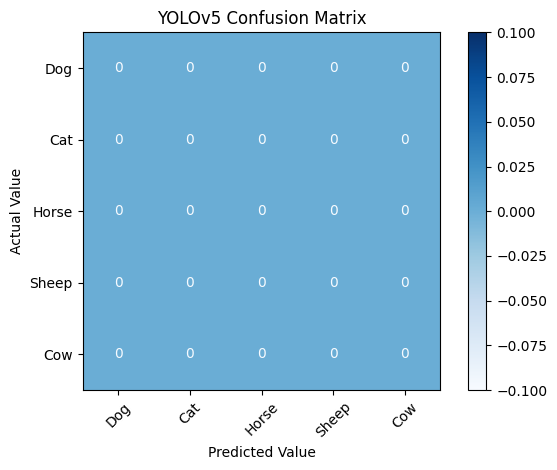

In [ ]:

# Create confusion matrix - only use target classes
print("\nGenerating confusion matrix...")
# Filter to only include target classes in confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("YOLOv5 Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.tight_layout()
plt.show()

In [ ]:
# Additional metrics per class
print("\nPer-class accuracy:")
for cls in classes:
    cls_indices = [i for i, label in enumerate(y_true) if label == cls]
    if cls_indices:
        cls_predictions = [y_pred[i] for i in cls_indices]
        cls_accuracy = sum([1 for pred in cls_predictions if pred == cls]) / len(cls_predictions)
        print(f"  {cls}: {cls_accuracy * 100:.2f}% ({sum([1 for pred in cls_predictions if pred == cls])}/{len(cls_predictions)})")

print("\n" + "="*50)


Per-class accuracy:
  Dog: 0.00% (0/200)
  Cat: 0.00% (0/200)
  Horse: 0.00% (0/200)
  Sheep: 0.00% (0/200)
  Cow: 0.00% (0/200)

